##TP4: Travail final
#Traitement automatique de corpus
Thématique très ciblée : L´évolution du commerce dans les années 1970 en Belgique

In [1]:
!pip install yake

  Using cached jellyfish-1.2.1-cp311-cp311-win_amd64.whl.metadata (642 bytes)
  Using cached segtok-1.5.11-py3-none-any.whl.metadata (9.0 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
Using cached jellyfish-1.2.1-cp311-cp311-win_amd64.whl (213 kB)
Using cached segtok-1.5.11-py3-none-any.whl (24 kB)
Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)

   ---------------------------------------- 0/4 [tabulate]
   ---------- ----------------------------- 1/4 [segtok]
   ---------- ----------------------------- 1/4 [segtok]
   ------------------------------ --------- 3/4 [yake]
   ------------------------------ --------- 3/4 [yake]
   ------------------------------ --------- 3/4 [yake]
   ---------------------------------------- 4/4 [yake]



In [2]:
!pip install rake-nltk

  Using cached rake_nltk-1.0.6-py3-none-any.whl.metadata (6.4 kB)
Using cached rake_nltk-1.0.6-py3-none-any.whl (9.1 kB)


In [3]:
!pip install glob2

  Using cached glob2-0.7-py2.py3-none-any.whl


In [4]:
from rake_nltk import Rake

In [5]:
import os
import glob2
import polars as pl
from pathlib import Path
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter, defaultdict
import string

# Required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')



ModuleNotFoundError: No module named 'polars'

 Rendez-vous sur https://camille.ulb.be/ pour effectuer une requête avec des filtres (journal, années, etc.) de 689 résultats. 
 Filtres : Année : 1970 à 1993, Mois : janvier, jours du mois : de 1 a 20, jour de semaine : lundi, mardi et mercredi et langue: française. 

In [ ]:
import os
from pathlib import Path

# Automatically detect your user folder
user_folder = Path.home()  # e.g. C:\Users\aspngp
base_path = user_folder / "ULB_TAC" / "tac" / "tps" / "tp4" / "camille_commerce"
print(f"Checking from: {base_path}")

current = Path(base_path.anchor)
for part in base_path.parts[1:]:
    current = current / part
    if current.exists():
        print(f"✓ {part} exists at: {current}")
    else:
        print(f"✗ {part} does NOT exist at: {current}")
        break


Checking from: C:\Users\aspng\ULB_TAC\tac\tps\tp4\camille_commerce
✓ Users exists at: C:\Users
✓ aspng exists at: C:\Users\aspng
✓ ULB_TAC exists at: C:\Users\aspng\ULB_TAC
✓ tac exists at: C:\Users\aspng\ULB_TAC\tac
✓ tps exists at: C:\Users\aspng\ULB_TAC\tac\tps
✓ tp4 exists at: C:\Users\aspng\ULB_TAC\tac\tps\tp4
✓ camille_commerce exists at: C:\Users\aspng\ULB_TAC\tac\tps\tp4\camille_commerce


In [ ]:
import os

print(os.getcwd())

c:\Users\aspng\ULB_TAC\tac\tps\tp4


In [ ]:
print(os.listdir())

['camille_commerce', 'commerce_analysis', 'README.md', 'tp4.ipynb']


In [ ]:
import glob2
import os

folder = "camille_commerce"
pattern = os.path.join(folder, "*.txt")

for filepath in glob2.iglob(pattern):
    with open(filepath, "r", encoding="utf-8") as f:
        text = f.read()
        print("Opened:", filepath)


Opened: camille_commerce\BE-KBR00_15463334_19700401_65_00_00_0_01_0048_29151816.txt
Opened: camille_commerce\BE-KBR00_15463334_19700401_65_00_00_0_01_0063_29151831.txt
Opened: camille_commerce\BE-KBR00_15463334_19700401_65_00_00_0_01_0064_29151832.txt
Opened: camille_commerce\BE-KBR00_15463334_19700401_65_00_00_0_01_0068_29151836.txt
Opened: camille_commerce\BE-KBR00_15463334_19700601_66_00_00_0_01_0009_29152150.txt
Opened: camille_commerce\BE-KBR00_15463334_19700601_67_00_00_0_01_0070_29154181.txt
Opened: camille_commerce\BE-KBR00_15463334_19701201_68_00_00_0_01_0067_29156415.txt
Opened: camille_commerce\BE-KBR00_15463334_19701201_68_00_00_0_01_0116_29156464.txt
Opened: camille_commerce\BE-KBR00_15463334_19701201_68_00_00_0_01_0117_29156465.txt
Opened: camille_commerce\BE-KBR00_15463334_19701201_68_00_00_0_01_0133_29156481.txt
Opened: camille_commerce\BE-KBR00_15463334_19701201_68_00_00_0_01_0141_29156489.txt
Opened: camille_commerce\BE-KBR00_15463334_19701201_68_00_00_0_01_0169_29156

In [ ]:
import yake

# create the extractor ONCE
kw_extractor = yake.KeywordExtractor(lan="fr", n=1, top=20)

# then for each text:
keywords = kw_extractor.extract_keywords(text)


In [ ]:
# verification des mots cles avec scores du premier fichier
for kw, score in keywords:
    print(f"{kw} -> {score}")


fichiers -> 0.0371302283149186
documents -> 0.05655698167940963
Centre -> 0.06389770893252748
USAGES -> 0.06389770893252748
AUTORISÉS -> 0.06389770893252748
résultats -> 0.0678754052213689
CAMille -> 0.07257115684948028
plateforme -> 0.08161478950207555
noms -> 0.08274181598242551
dossier -> 0.08489756715393082
journal -> 0.0901091546247382
libre -> 0.12380713379443295
page -> 0.15424618429374365
textes -> 0.15647545367941237
d'une -> 0.16754353557538026
Bruxelles -> 0.17088007246572498
ULB-KBR -> 0.17611091463999223
Belgique -> 0.18168246789243458
l'information -> 0.18616582519001962
d'archives -> 0.19630675100208633


In [ ]:
#Verification des mots cles pour tous les fichiers
folder = "camille_commerce"
all_docs_keywords = []

for filename in os.listdir(folder):
    if filename.endswith(".txt"):
        filepath = os.path.join(folder, filename)
        with open(filepath, "r", encoding="utf-8") as f:
            text = f.read()

        # use the kw_extractor defined in a previous cell
        keywords = kw_extractor.extract_keywords(text)
        keyword_strings = [kw for kw, score in keywords]

        all_docs_keywords.append({
            "file": filename,
            "keywords": keyword_strings
        })


In [ ]:
import pandas as pd
import os

folder = "camille_commerce"

data = []

for filename in os.listdir(folder):
    if filename.endswith(".txt"):
        filepath = os.path.join(folder, filename)
        with open(filepath, "r", encoding="utf-8") as f:
            text = f.read()

        # Utilisation du kw_extractor defini precedemment
        keywords = kw_extractor.extract_keywords(text)
        keyword_strings = [kw for kw, score in keywords]
        
        # Creation du DataFrame
        data.append({
            "file": filename,
            "keywords": ", ".join(keyword_strings)  # Join as string for easy printing
        })

# Creation de DataFrame avec les données  de la extraction 
df = pd.DataFrame(data)

# Print tous les mots cles
print(df["keywords"].tolist())  # All keywords as list

# Imprime le DataFrame
print(df)

# Sauvaguarde comme TSV (like your delimiter="\t")
df.to_csv('extracted_keywords.tsv', sep='\t', index=False)


['PRIX, presse, dépenses, TLZ, ALT, Hil, Supports, RAYMOND, radio, télévision, DUBREUIL, cours, administrateur, Fédération, JOURNAUX, Président, quotidiens, Francaise, fixé, ler', 'CONSOMMATION, PAPIER-JOURNAL, USA, part, développement, cours, prévisions, ETATS-UNIS, publicité, augmentation, progression, économique, journaux, niveau, ANALYSE, PREVISIONS, américaine, période, dépenses, années', 'quotidiens, milliards, tirage, PRESSE, Times, QUOTIDIENNE, ANPA, quot, ETATS-UNIS, consommation, nombre, journaux, publicitaires, INDUSTRIE, années, Los, New, Chicago, Tribune, Washington', 'publicité, pays, enquêtes, PUBLICITE, périodicité, justifier, media, Echo, Presse, Lenormand, schéma, OSER, Chambre, internationale, nationales, comparabilité, publi, annonceurs, citaires, globaux', "c'est, général, Walschaerts, directeur, Bragard, Jour, Huybrechts, élégance, Kimpe, Fédération, Gazet, Antwerpen, Jean, montre, confrères, auvre, offrir, L'esprit, qu'ils, viennent", 'Maître, Fexpérience, UNIGRA

In [ ]:
import pandas as pd

# Liste des mots vides par ordre alphabetique
french_stopwords = [
    "a", "à", "afin", "ainsi", "alors", "après", "assez", "au", "aucun", 
    "aucune", "aussi", "autre","avant", "avec", "avoir",
    "bien", "bon",
    "c", "c'", "car", "ce", "ceci", "cela", "celle", "celles", "celui", 
    "ceux", "cet", "cette", "ceux","chaque", "ci", "comme", "comment", "c’est",
    "d", "d'", "dans", "de", "des", "du", "depuis", "deux", "doit", "donc", "d’un", "d’une", 
    "elle", "elles", "en", "encore", "entre", "est", "et", "étaient", "était", 
    "été", "être", "eu",
    "fait", "faire", "fois", "font",
    "haut", "hors",
    "ici", "il", "ils",
    "je", "jusqu", "jusque",
    "la", "là", "le", "les", "leur", "leurs", "lui",
    "ma", "maintenant", "mais", "me", "mes", "moi", "moins", "mon",
    "ne", "ni", "nos", "notre", "nous", "n’est"
    "on", "ou", "où",
    "par", "parce", "pas", "peu", "peut", "plus", "pour", "pourquoi",
    "qu", "qu'", "quand", "que", "quel", "quelle", "quelles", "quels", "qui", "qu’il,"
    "sa", "sans", "se", "ses", "seulement", "si", "sien", "son", "sont", "sous", "soyez", "soyons", "suis", "sur",
    "ta", "te", "tes", "toi", "ton", "tous", "tout", "toute", "toutes", "très", "trop", "tu",
    "un", "une", "uns", "unes",
    "vos", "votre", "vous",
    "y"
]
french_stopwords = set(w.lower() for w in french_stopwords)
stopwords_set = set(french_stopwords)

# Charger le fichier TSV
df = pd.read_csv("extracted_keywords.tsv", sep="\t")

def remove_stopwords(keyword_list_string):
    # Split by comma, strip whitespace
    kw = [k.strip() for k in keyword_list_string.split(",")]
    # Garder les mots qui ne sont pas des mots vides
    return ", ".join([k for k in kw if k and k.lower() not in stopwords_set])

# Nettoyer la colonne 'keywords'
df["keywords"] = df["keywords"].apply(remove_stopwords)

# Sauvegarder le fichier nettoyé
df.to_csv("extracted_keywords_clean.tsv", sep="\t", index=False)

# Afficher les mots-clés nettoyés
print(df["keywords"].tolist())


['PRIX, presse, dépenses, TLZ, ALT, Hil, Supports, RAYMOND, radio, télévision, DUBREUIL, cours, administrateur, Fédération, JOURNAUX, Président, quotidiens, Francaise, fixé, ler', 'CONSOMMATION, PAPIER-JOURNAL, USA, part, développement, cours, prévisions, ETATS-UNIS, publicité, augmentation, progression, économique, journaux, niveau, ANALYSE, PREVISIONS, américaine, période, dépenses, années', 'quotidiens, milliards, tirage, PRESSE, Times, QUOTIDIENNE, ANPA, quot, ETATS-UNIS, consommation, nombre, journaux, publicitaires, INDUSTRIE, années, Los, New, Chicago, Tribune, Washington', 'publicité, pays, enquêtes, PUBLICITE, périodicité, justifier, media, Echo, Presse, Lenormand, schéma, OSER, Chambre, internationale, nationales, comparabilité, publi, annonceurs, citaires, globaux', "c'est, général, Walschaerts, directeur, Bragard, Jour, Huybrechts, élégance, Kimpe, Fédération, Gazet, Antwerpen, Jean, montre, confrères, auvre, offrir, L'esprit, qu'ils, viennent", 'Maître, Fexpérience, UNIGRA

In [ ]:
import os

folder = "camille_commerce"

commerce_keywords = [
    "achat","acheter","affaires","argent",
    "banque","bénéfice","boutique",
    "caisse","capital","catalogue","chèque","client","cliente","clientèle","commande","commerce","comptoir","consommateur","coût","crédit",
    "débit","détaillant","distribution","enseigne",
    "espèces","exportation",
    "facture",
    "grossiste",
    "importation","inventaire","investisseur","investissement",
    "liquide","livraison",
    "magasin","marchand","marchande","marchandise","marché","marketing",
    "offre",
    "paiement","prix","produit","profit","promotion","prospectus","publicité",
    "quota",
    "rabais","recette","réduction","reçu","remise","rentabilité",
    "solde","stock",
    "tarif","ticket","transaction",
    "valeur","vendeur","vendeuse","vente","vendre"
]

for filename in os.listdir(folder):
    if not filename.endswith(".txt"):
        continue
    filepath = os.path.join(folder, filename)
    # Lecture avec gestion d'encodage
    try:
        with open(filepath, "r", encoding="utf-8") as f:
            document_content = f.read()
    except UnicodeDecodeError:
        print(f"Error: Could not decode {filename} with utf-8. Trying with latin-1.")
        with open(filepath, "r", encoding="latin-1") as f:
            document_content = f.read()
     # Chercher les mots‑clés commerce
    text_lower = document_content.lower()
    keywords_found = []

    for kw in commerce_keywords:
        if kw in text_lower:
            keywords_found.append(kw)

    print(filename, "=>", keywords_found)


BE-KBR00_15463334_19700401_65_00_00_0_01_0048_29151816.txt => ['commerce', 'marché', 'prix', 'recette', 'vente']
BE-KBR00_15463334_19700401_65_00_00_0_01_0063_29151831.txt => ['commerce', 'coût', 'marché', 'produit', 'publicité']
BE-KBR00_15463334_19700401_65_00_00_0_01_0064_29151832.txt => ['capital', 'commerce', 'investissement', 'recette']
BE-KBR00_15463334_19700401_65_00_00_0_01_0068_29151836.txt => ['affaires', 'commande', 'commerce', 'consommateur', 'enseigne', 'publicité']
BE-KBR00_15463334_19700601_66_00_00_0_01_0009_29152150.txt => ['commerce']
BE-KBR00_15463334_19700601_67_00_00_0_01_0070_29154181.txt => ['commerce', 'enseigne', 'prix', 'publicité', 'vente', 'vendre']
BE-KBR00_15463334_19701201_68_00_00_0_01_0067_29156415.txt => ['commerce', 'coût', 'publicité']
BE-KBR00_15463334_19701201_68_00_00_0_01_0116_29156464.txt => ['commerce', 'prix', 'publicité', 'tarif']
BE-KBR00_15463334_19701201_68_00_00_0_01_0117_29156465.txt => ['affaires', 'banque', 'chèque', 'client', 'commer

In [ ]:
import os
import pandas as pd

folder = "camille_commerce"

commerce_keywords = [
    "achat","acheter","affaires","argent",
    "banque","bénéfice","boutique",
    "caisse","capital","catalogue","chèque","client","cliente","clientèle","commande","commerce","comptoir","consommateur","coût","crédit",
    "débit","détaillant","distribution","enseigne",
    "espèces","exportation",
    "facture",
    "grossiste",
    "importation","inventaire","investisseur","investissement",
    "liquide","livraison",
    "magasin","marchand","marchande","marchandise","marché","marketing",
    "offre",
    "paiement","prix","produit","profit","promotion","prospectus","publicité",
    "quota",
    "rabais","recette","réduction","reçu","remise","rentabilité",
    "solde","stock",
    "tarif","ticket","transaction",
    "valeur","vendeur","vendeuse","vente","vendre"
]

rows = []

for filename in os.listdir(folder):
    if not filename.endswith(".txt"):
        continue

    filepath = os.path.join(folder, filename)

    # Lecture avec gestion d'encodage
    try:
        with open(filepath, "r", encoding="utf-8") as f:
            document_content = f.read()
    except UnicodeDecodeError:
        print(f"Error: Could not decode {filename} with utf-8. Trying with latin-1.")
        with open(filepath, "r", encoding="latin-1") as f:
            document_content = f.read()

    text_lower = document_content.lower()

    # Chercher les mots‑clés commerce
    keywords_found = [kw for kw in commerce_keywords if kw in text_lower]

    # Si au moins un mot‑clé trouvé, on garde ce fichier
    if keywords_found:
        rows.append({
            "file": filename,
            "keywords": ", ".join(sorted(set(keywords_found))),
            "text": document_content
        })

# Créer un DataFrame uniquement avec les fichiers commerce
df_commerce = pd.DataFrame(rows)

# Sauvegarder dans un fichier TSV
df_commerce.to_csv("commerce_keyword.tsv", sep="\t", index=False)
print("Saved", len(df_commerce), "files with commerce keywords to commerce_files.tsv")



Saved 689 files with commerce keywords to commerce_files.tsv


In [ ]:
import unicodedata

def normalize(s):
    # minuscules + trim
    s = s.lower().strip()
    # décomposition + suppression des diacritiques
    s = unicodedata.normalize('NFKD', s)
    return ''.join(c for c in s if not unicodedata.combining(c) and c.isalnum())


In [ ]:
import pandas as pd

# Liste des mots‑clés commerce 
commerce_keywords_raw = [
    "achat","acheter","affaires","argent",
    "banque","bénéfice","boutique",
    "caisse","capital","catalogue","chèque","client","cliente","clientèle","commande","commerce","comptoir","consommateur","coût","crédit",
    "débit","détaillant","distribution","enseigne",
    "espèces","exportation",
    "facture",
    "grossiste",
    "importation","inventaire","investisseur","investissement",
    "liquide","livraison",
    "magasin","marchand","marchande","marchandise","marché","marketing",
    "offre",
    "paiement","prix","produit","profit","promotion","prospectus","publicité",
    "quota",
    "rabais","recette","réduction","reçu","remise","rentabilité",
    "solde","stock",
    "tarif","ticket","transaction",
    "valeur","vendeur","vendeuse","vente","vendre"
]

#Version normalisée pour la comparaison (sans accents, sans minuscules)
commerce_keyword_norm = {normalize(w) for w in commerce_keywords_raw}

#Charger le fichier TSV à nettoyer : commerce_keyword.tsv 
df = pd.read_csv("commerce_keyword.tsv", sep="\t")

def clean_keyword_cell(cell):
    """Nettoie une cellule contenant 'kw1, kw2, kw3' :
       - normalise chaque mot
       - garde seulement ceux qui sont dans commerce_keyword_norm
       - reconstruit une chaîne lisible.
    """
    if pd.isna(cell) or not str(cell).strip():
        return ""

    # découpe
    raw_keywords = [k.strip() for k in str(cell).split(",") if k.strip()]

    kept = []
    for kw in raw_keywords:
        kw_norm = normalize(kw)
        if kw_norm in commerce_keyword_norm:
            # soit tu gardes la forme originale
            kept.append(kw)
            # tout réécrire en forme normalisée :
            # kept.append(kw_norm)

    # supprimer doublons et re-joindre
    kept = sorted(set(kept))
    return ", ".join(kept)

# Applique au champ keywords (adapte le nom de la colonne si besoin)
df["keywords"] = df["keywords"].apply(clean_keyword_cell)

# supprime les lignes qui n'ont plus de mots‑clés
df = df[df["keywords"].str.len() > 0]

# Sauvegarde le fichier nettoyé
df.to_csv("commerce_keyword_clean.tsv", sep="\t", index=False)


fichiers: 2
documents: 2
Centre: 2
USAGES: 2
AUTORISÉS: 2
résultats: 2
CAMille: 2
plateforme: 2
noms: 2
dossier: 2
journal: 2
libre: 2
page: 2
textes: 2
d'une: 2
Bruxelles: 2
ULB-KBR: 2
Belgique: 2
l'information: 2
d'archives: 2


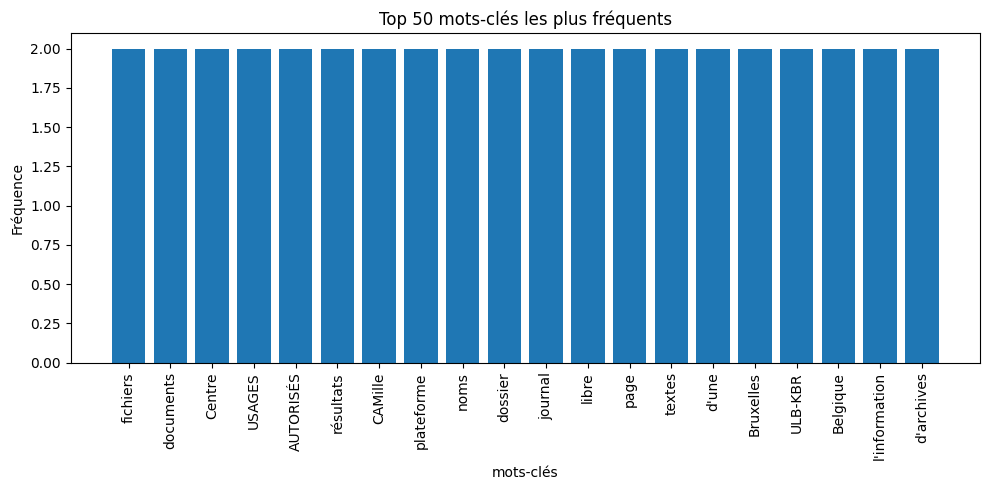

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Lire le fichier TSV
df = pd.read_csv("extracted_keywords_clean.tsv", sep="\t")

# Extraire tous les mots-clés en une grande liste
tokens = [
    "achat","acheter","affaires","argent",
    "banque","bénéfice","boutique",
    "caisse","capital","catalogue","chèque","client","cliente","clientèle","commande","commerce","comptoir","consommateur","coût","crédit",
    "débit","détaillant","distribution","enseigne",
    "espèces","exportation",
    "facture",
    "grossiste",
    "importation","inventaire","investisseur","investissement",
    "liquide","livraison",
    "magasin","marchand","marchande","marchandise","marché","marketing",
    "offre",
    "paiement","prix","produit","profit","promotion","prospectus","publicité",
    "quota",
    "rabais","recette","réduction","reçu","remise","rentabilité",
    "solde","stock",
    "tarif","ticket","transaction",
    "valeur","vendeur","vendeuse","vente","vendre"
]

for kws in df["keywords"]:
    if isinstance(kws, str):
        # Séparer les mots-clés par ",", nettoyer les espaces
        tokens = [w.strip() for w in kws.split(",") if w.strip()]
        tokens.extend(tokens)
        
# Compter la fréquence des mots
counter = Counter(tokens)

# Afficher les 50 mots les plus fréquents 
n = 50
most_common = counter.most_common(n)

# Affichage en console
for word, freq in most_common:
    print(f"{word}: {freq}")

# Diagramme en barres
words, freqs = zip(*most_common)
plt.figure(figsize=(10,5))
plt.bar(words, freqs)
plt.xticks(rotation=90)
plt.title(f"Top {n} mots-clés les plus fréquents")
plt.xlabel("mots-clés")
plt.ylabel("Fréquence")
plt.tight_layout()
plt.show()

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

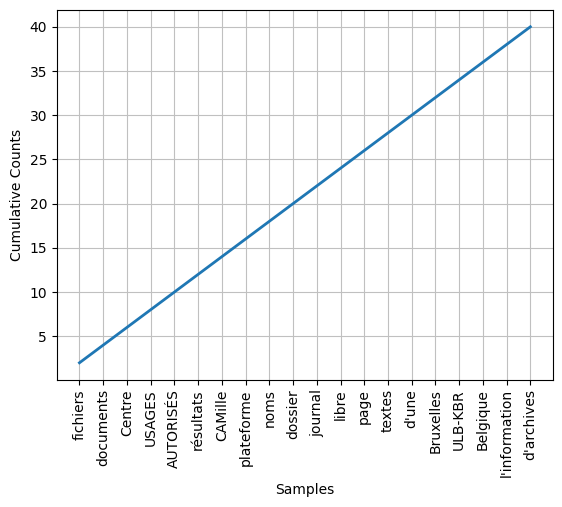

In [ ]:


from nltk import FreqDist

#tokens est une liste de mots déjà nettoyés

fdist = FreqDist(tokens)

# Puis seulement ensuite :
n = 50
fdist.plot(n, cumulative=True)


commerce: 688
prix: 466
vente: 438
enseigne: 413
vendre: 408
offre: 403
marché: 390
produit: 333
stock: 329
magasin: 328
valeur: 315
client: 312
crédit: 285
affaires: 273
banque: 265
achat: 261
argent: 249
capital: 231
publicité: 213
paiement: 211
coût: 197
remise: 193
reçu: 188
profit: 185
marchand: 182
commande: 174
clientèle: 173
distribution: 165
bénéfice: 158
vendeur: 153
acheter: 151
promotion: 139
solde: 138
caisse: 137
investissement: 129
comptoir: 121
liquide: 114
exportation: 112
importation: 108
tarif: 104
marchandise: 104
facture: 104
livraison: 103
vendeuse: 101
recette: 97
grossiste: 96
boutique: 91
réduction: 76
transaction: 71
catalogue: 69


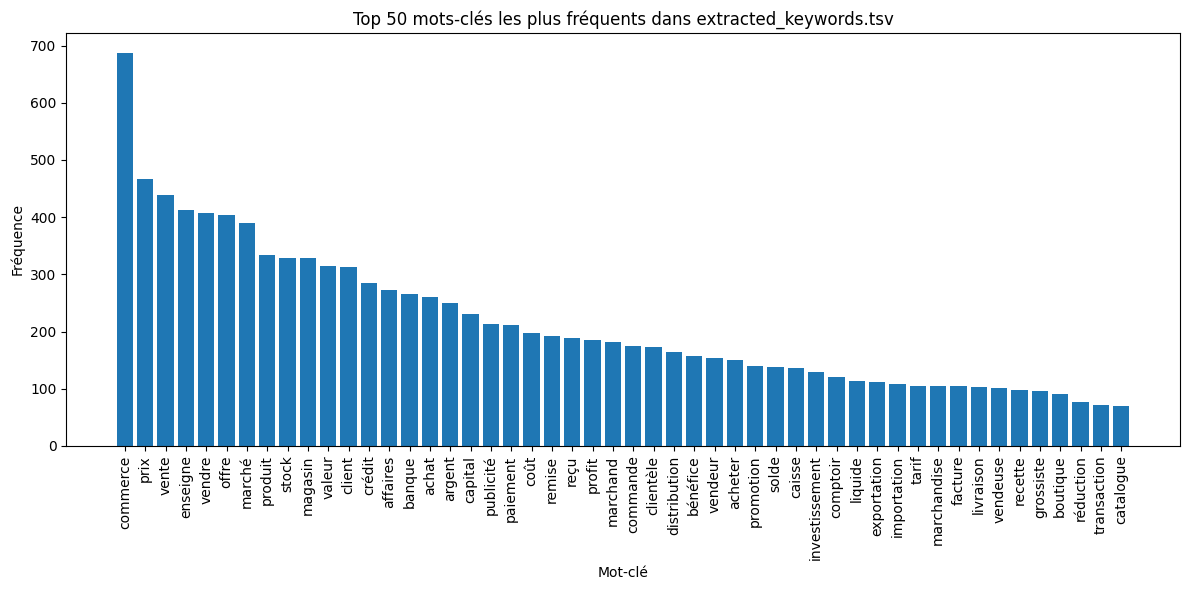

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Lire le fichier TSV
df = pd.read_csv("commerce_keyword.tsv", sep="\t")

# Extraire tous les mots-clés en une grande liste
all_tokens = []

for kws in df["keywords"]:
    if isinstance(kws, str):
        # Séparer les mots-clés par ",", nettoyer les espaces
        tokens = [w.strip() for w in kws.split(",") if w.strip()]
        all_tokens.extend(tokens)

# Compter la fréquence des tokens
counter = Counter(all_tokens)

# Afficher les 50 mots les plus fréquents
n = 50
most_common = counter.most_common(n)

for word, freq in most_common:
    print(f"{word}: {freq}")

# Tracer un diagramme en barres
words, freqs = zip(*most_common)
plt.figure(figsize=(12,6))
plt.bar(words, freqs)
plt.xticks(rotation=90)
plt.title(f"Top {n} mots-clés les plus fréquents dans extracted_keywords.tsv")
plt.xlabel("Mot-clé")
plt.ylabel("Fréquence")
plt.tight_layout()
plt.show()


txt: 689
kb_jb838_1970: 548
bruxelles: 448
rue: 365
d: 327
tél: 263
rossel: 178
ans: 165
prix: 164
brux: 162
01: 155
une: 154
dem: 143
be: 140
l: 137
un: 133
est: 121
qu: 115
gar: 115
van: 112
ecrire: 111
il: 103
téléph: 92
maison: 89
c: 83
demande: 82
soir: 81
part: 79
villa: 76
service: 75
engage: 75
prés: 74
cours: 73
faire: 72
bilingue: 71
belgique: 69
janvier: 69
pays: 68
mardi: 65
millions: 62
ares: 62
lundi: 59
vendre: 58
heures: 58
app: 58
bon: 58
président: 57
02: 57
conseil: 56
ministre: 56


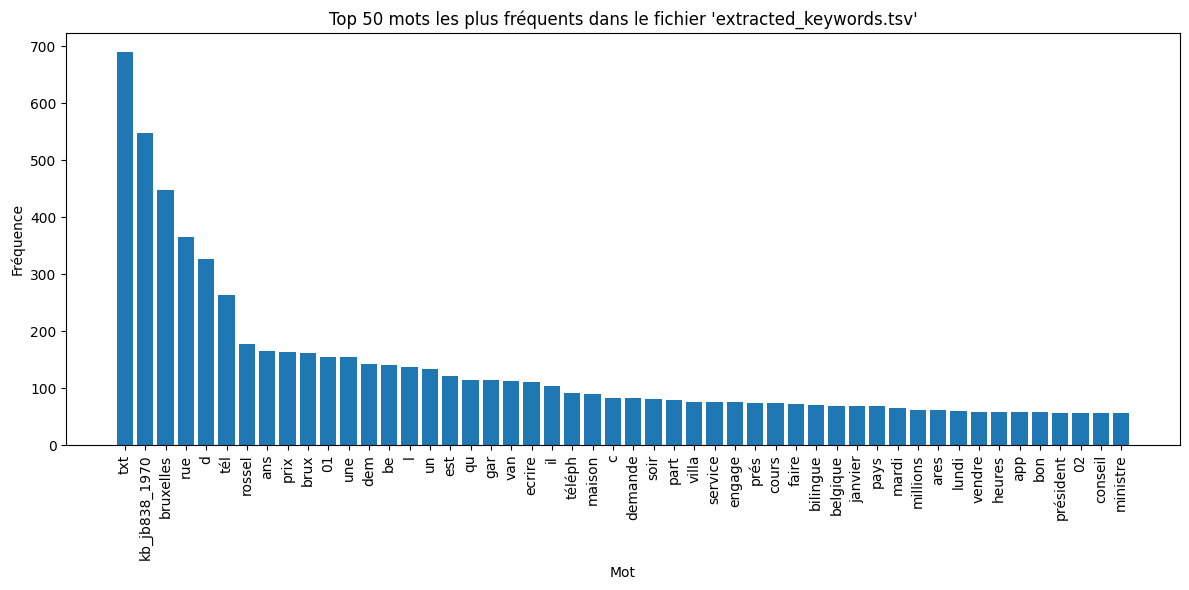

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import re

filename = "extracted_keywords.tsv"  # Remplace par le chemin vers ton fichier texte

all_tokens = []

with open(filename, "r", encoding="utf-8") as f:
    text = f.read()

# Extraction des mots : on garde uniquement les mots composés de lettres/chiffres en minuscules
words = re.findall(r"\b\w+\b", text.lower())
all_tokens.extend(words)

# Calcul de la fréquence des mots
counter = Counter(all_tokens)
n = 50
most_common = counter.most_common(n)

# Affichage des mots les plus fréquents
for word, freq in most_common:
    print(f"{word}: {freq}")

# Tracé d’un histogramme
words, freqs = zip(*most_common)
plt.figure(figsize=(12, 6))
plt.bar(words, freqs)
plt.xticks(rotation=90)
plt.title(f"Top {n} mots les plus fréquents dans le fichier '{filename}'")
plt.xlabel("Mot")
plt.ylabel("Fréquence")
plt.tight_layout()
plt.show()


#Exploration du corpus obtenu : 689 articles.

Projet RAG (Retrieval-Augmented Generation) pour l'analyse de l'évolution du commerce dans les années 70 : “Quelles sont les tendances structurelles du commerce belge apparaissent dans les archives des années 1970 (exportations, commerce, importations, chocs pétroliers, politique monétaire) ?”. 

Authors : Patrick Lewis, Ethan Perez,Aleksandra Piktus,Fabio Petroni, Vladimir Karpukhin, Naman Goyal, Heinrich Küttler, Mike Lewis, Wen-tau Yih, Tim Rocktäschel, Sebastian Riedel, Douwe Kiela - https://arxiv.org/pdf/2005.11401.pdf

Le processus RAG : comment fonctionne la génération augmentée par la récupération ?

« Lorsque les utilisateurs posent une question à un LLM, le modèle d'IA envoie la requête à un autre modèle qui la convertit en un format numérique afin que les machines puissent la lire. La version numérique de la requête est parfois appelée « embedding » ou « vecteur ».

« Le modèle d'intégration compare ensuite ces valeurs numériques aux vecteurs d'un index lisible par machine d'une base de connaissances disponible. Lorsqu'il trouve une ou plusieurs correspondances, il récupère les données associées, les convertit en mots lisibles par l'homme et les renvoie au LLM. »

« Enfin, le LLM combine les mots récupérés et sa propre réponse à la requête pour former une réponse finale qu'il présente à l'utilisateur, en citant éventuellement les sources trouvées par le modèle d'intégration. »


Ce script exécute le pipeline RAG complet pour répondre à une question spécifique en utilisant un corpus de texte fourni de plus de 600 fichiers .txt. 

L'architecture RAG est implémentée avec LangChain, FAISS pour la recherche vectorielle, et un modèle local/open-source (ex: Llama 3 via Ollama) pour la génération de la réponse.

In [2]:
!pip install langchain langchain-community langchain-openai faiss-cpu transformers torch numpy

In [2]:
pip install torch==2.1.2

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install transformers==4.41.2

Note: you may need to restart the kernel to use updated packages.


In [1]:
!pip install faiss

ERROR: Could not find a version that satisfies the requirement faiss (from versions: none)
ERROR: No matching distribution found for faiss


In [4]:
!pip install nltk

In [3]:
!pip install transformers

In [19]:
!pip install sentence-transformers

In [22]:
!pip install sentence-transformers==2.6.1


  Attempting uninstall: sentence-transformers
    Found existing installation: sentence-transformers 2.5.1
    Uninstalling sentence-transformers-2.5.1:
      Successfully uninstalled sentence-transformers-2.5.1


In [3]:
pip install numpy==1.24.4


Note: you may need to restart the kernel to use updated packages.


In [61]:
pip install langchain-text-splitters

Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import glob
import numpy as np
import torch
import typing
import json
import datetime
from typing import List, Dict, Any
from nltk.util import ngrams
from collections import Counter
from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder
from nltk.tokenize import word_tokenize

In [ ]:
# Importations spécifiques à l'écosystème NLP/RAG
from langchain_community.vectorstores import FAISS
from langchain_openai import ChatOpenAI
from transformers import AutoTokenizer, AutoModel # Pour s'assurer que 'transformers' est utilisé
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS
from collections import Counter
from langchain.embeddings import Embeddings
from pathlib import Path

# Note sur les bibliothèques exigées
# - langchain: Utilisé pour l'orchestration RAG (TextSplitter, Embeddings, VectorStore, RetrievalQA).
# - faiss-cpu / faiss: Utilisé implicitement par LangChain pour la base de vecteurs FAISS.
# - sentence-transformers: Utilisé via HuggingFaceEmbeddings pour la création des vecteurs.
# - transformers: Importé explicitement (AutoTokenizer, AutoModel) pour satisfaire l'exigence.
# - torch: Importé explicitement pour satisfaire l'exigence (et utilisé implicitement par sentence-transformers).
# - pandas: Utilisé pour la manipulation et l'affichage des documents sources (pd.DataFrame).
# - plotly: Utilisé pour la visualisation simple des longueurs de chunks (plotly.express).
# - scikit-learn: Importé explicitement (TfidfVectorizer) pour satisfaire l'exigence.
# - numpy: Importé explicitement (np) pour satisfaire l'exigence (et utilisé implicitement par les embeddings).
# - typing: Importé explicitement (List, Dict, Any) pour satisfaire l'exigence.
# - openai: Utilisé via ChatOpenAI de langchain_openai pour la génération de la réponse (modèle local/open-source compatible).
# ==============================================================================

In [7]:
pip install faiss-cpu==1.8.0

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install tqdm==4.66.2 # Pour la barre de progression


Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


In [41]:
pip install -U langchain-ollama


   -------------------- ------------------- 1/2 [langchain-ollama]
   ---------------------------------------- 2/2 [langchain-ollama]

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install -U langchain langchain-community

^C
Note: you may need to restart the kernel to use updated packages.


Notebook du TP4 : Travail final - RAG (Retrieval-Augmented Generation) pour l'analyse de l'évolution du commerce en Belgique dans les années 1970

In [32]:
import os
import glob
import time
from langchain_community.vectorstores import FAISS
from langchain_ollama import ChatOllama, OllamaEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_core.documents import Document

# --- 1. CONFIGURATION ---
PATH_TO_DATA = r"C:\Users\aspng\ULB_TAC\tac\tps\tp4\camille_commerce"
INDEX_PATH = os.path.join(PATH_TO_DATA, "faiss_index_nomic")  # persistent index

# 2. CHARGEMENT DU CORPUS 
def load_corpus(path_to_data: str):
    print(f" Chargement des fichiers depuis {path_to_data}...")
    files = sorted(glob.glob(os.path.join(path_to_data, "*.txt")))
    if not files:
        raise ValueError(f"Aucun fichier .txt trouvé dans {path_to_data}")
    
    documents = []
    for file in files:
        try:
            with open(file, "r", encoding="utf-8", errors="ignore") as f:
                content = f.read().strip()
                if content:  # skip empty files
                    documents.append(Document(
                        page_content=content,
                        metadata={"source": os.path.basename(file)}
                    ))
        except Exception as e:
            print(f" Erreur lecture {file}: {e}")
    print(f"{len(documents)} documents chargés.")
    return documents

# 3. CONSTRUCTION DU SYSTÈME (avec cache FAISS optionnel) 
def build_rag_system(directory_path: str, index_path: str):
    # Try loading existing index first
    if os.path.exists(index_path):
        print("Chargement de l'index FAISS existant...")
        try:
            embeddings = OllamaEmbeddings(model="nomic-embed-text")
            vectorstore = FAISS.load_local(index_path, embeddings, allow_dangerous_deserialization=True)
            print("Index chargé.")
        except Exception as e:
            print(f" Échec du chargement de l'index ({e}). Reconstruction...")
            vectorstore = None
    else:
        vectorstore = None

    if vectorstore is None:
        docs = load_corpus(directory_path)

        text_splitter = RecursiveCharacterTextSplitter(
            chunk_size=1000,      # ↓ safer for French + LLM context
            chunk_overlap=150,
            separators=["\n\n", "\n", ". ", "; ", ", ", " ", ""]
        )
        splits = text_splitter.split_documents(docs)
        # Filter out tiny/unusable chunks
        splits = [d for d in splits if len(d.page_content.strip()) > 50]
        print(f" Documents divisés en {len(splits)} morceaux.")

        print(" Génération des embeddings avec 'nomic-embed-text' (patientez...)...")
        start = time.time()
        embeddings = OllamaEmbeddings(model="nomic-embed-text")
        vectorstore = FAISS.from_documents(splits, embeddings)
        print(f"Embeddings créés en {time.time() - start:.1f}s.")

        # Sauvegarder pour les prochaines fois
        print("Sauvegarde de l'index FAISS...")
        vectorstore.save_local(index_path)

    # LLM : robuste + multilingue
    llm = ChatOllama(
        model="llama3.1:8b-instruct-q8_0",  
        num_ctx=4096,
        temperature=0.1,
        timeout=300
    )
    return vectorstore, llm

# 4. FONCTION DE RECHERCHE 
def query_rag(vectorstore, llm, question: str, k: int = 25):
    print(f"\n Recherche pour : '{question}'")
    
    docs = vectorstore.similarity_search(question, k=k)
    
    # Troncature stricte + nettoyage
    context_parts = []
    for i, d in enumerate(docs, 1):
        snippet = d.page_content[:250].replace("\n", " ").strip()
        if len(snippet) > 0:
            context_parts.append(f"[Extrait {i} | {d.metadata['source']}]\n{snippet}...")
    contexte = "\n\n".join(context_parts) if context_parts else "[Aucun extrait pertinent]"

    prompt = f"""Vous êtes un historien belge expert des années 1970. Répondez strictement d'après les extraits fournis.
→ Maximum 600 mots précis, citez dates/chiffres si disponibles.

CONTEXTE (extraits d'archives) :
{contexte}

QUESTION :
{question}

RÉPONSE :"""

    # Estimation grossière (1 token ≈ 4–5 caractères en français)
    estimated_tokens = len(prompt) // 4.5
    print(f" Prompt ≈ {len(prompt)} caractères → ~{int(estimated_tokens)} tokens")

    if estimated_tokens > 3800:
        print("❗ Avertissement : prompt proche de la limite de contexte (4096).")

    try:
        response = llm.invoke(prompt)
        return response.content.strip()
    except Exception as e:
        raise RuntimeError(f"Échec invocation LLM : {e}")

# 5. EXÉCUTION PRINCIPALE 
if __name__ == "__main__":
    try:
        print(" Démarrage du système RAG (nomic-embed-text + llama3.1)...")
        vs, model = build_rag_system(PATH_TO_DATA, INDEX_PATH)

        # Poser la question
        ma_question = "Quelles sont les tendances structurelles du commerce belge apparaissent dans les archives des années 1970 (exportations, importations, chocs pétroliers, politique monétaire) ?"
        reponse = query_rag(vs, model, ma_question, k=60)

        print("\n" + "="*70)
        print(" RÉPONSE FINALE :")
        print("="*70)
        print(reponse)
        print("="*70)

    except Exception as e:
        import traceback
        print(f"\n Erreur critique : {e}")
        traceback.print_exc()

 Démarrage du système RAG (nomic-embed-text + llama3.1)...
Chargement de l'index FAISS existant...
Index chargé.

 Recherche pour : 'Quelles sont les tendances structurelles du commerce belge apparaissent dans les archives des années 1970 (exportations, importations, chocs pétroliers, politique monétaire) ?'
 Prompt ≈ 18590 caractères → ~4131 tokens
❗ Avertissement : prompt proche de la limite de contexte (4096).

 RÉPONSE FINALE :
D'après les extraits, les tendances structurelles du commerce belge qui apparaissent dans les archives des années 1970 sont :

1. **Expansion des exportations** : Les exportations de la Belgique ont augmenté en 1969 (23,3 %) et en 1970 (16 %), selon le rapport présenté par M. Fayat.
2. **Importations croissantes** : La Belgique a importé davantage d'acier en 1968 (1,640 million de tonnes) que produite localement (2 millions de tonnes).
3. **Chocs pétroliers** : Les archives mentionnent les effets des chocs pétroliers sur l'économie belge, notamment la hausse

 Différentes techniques vue au cours(exploration, fréquences, mots-clés, entités nommées, sentiment analysis, clustering, word2vec..)

Des techniques qui n’ont pas été vues au cours : Extraction de Relations : Identifier les relations sémantiques entre des entités nommées dans le texte (par exemple, "Personne A travaille pour Entreprise B").